## 07-04 딥 러닝의 학습 방법

### 손실 함수(Loss function)

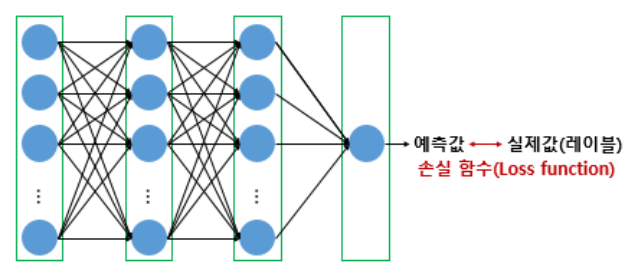  
회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다. 손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 w와 편향 b의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다. 

1. MSE(Mean Squared Error, MSE)

평균 제곱 오차는 선형 회귀를 학습할 때 배웠던 손실 함수입니다. 연속형 변수를 예측할 때 사용됩니다.

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

2. 이진 크로스 엔트로피(Binary Cross-Entropy)

이항 교차 엔트로피라고도 부르는 손실 함수입니다. 출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용합니다. 이는 로지스틱 회귀에서 사용했던 손실 함수입니다.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

3. 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

범주형 교차 엔트로피라고도 부르는 손실 함수입니다. 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용합니다. 소프트맥스 회귀에서 사용했던 손실 함수입니다.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

만약 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면 다음과 같이 'sparse_categorical_crossentropy'를 사용합니다.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

4. 그 외에 다양한 손실 함수들

https://www.tensorflow.org/api_docs/python/tf/keras/losses

### 배치 크기(Batch Size)에 따른 경사 하강법

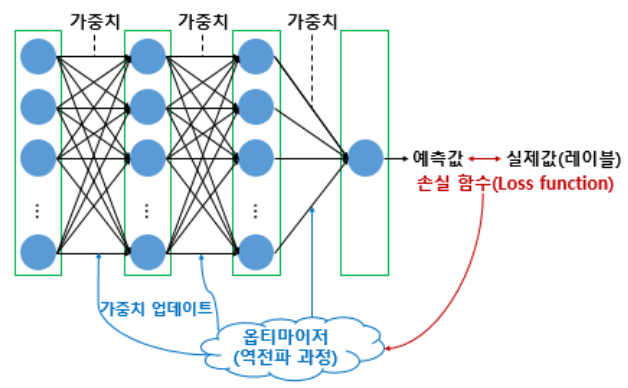  
손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다. 여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다. 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

1. 배치 경사 하강법(Batch Gradient Descent)

배치 경사 하강법(배치 크기: 데이터 전체): 오차(loss)를 구할 때 전체 데이터를 고려(한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행)  
배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있습니다.

2. 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

확률적 경사 하강법(배치 크기: 1): 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법d으로 더 적은 데이터를 사용하므로 더 빠르게 계산  
확률적 경사 하강법은 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능 하다는 장점이 있습니다.

3. 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

미니 배치 경사 하강법(배치 크기: 지정): 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정  
미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다. 가장 많이 사용되는 경사 하강법으로 앞으로 주로 배치 크기를 지정하여 미니 배치 경사 하강법으로 학습하게 될 것입니다. 배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적입니다. 만약, model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우에 기본값은 2의 5제곱에 해당하는 숫자인 32로 설정됩니다. 

### 옵티마이저(Optimizer)

1. 모멘텀(Momentum)

모멘텀: 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다.  
로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.

In [ ]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

2. 아다그라드(Adagrad)

아다그라드: 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

In [ ]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

3. 알엠에스프롭(RMSprop)

알엠에스프롭: 아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.

In [ ]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

4. 아담(Adam)

아담: 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.

In [ ]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

5. 사용 방법

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
# 문자열로 'adam'으로 작성하더라도 동작
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)

머신러닝의 학습: 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치 업데이트

1. 에포크(Epoch)

에포크: 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태  
에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다. 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다. 

2. 배치 크기(Batch size)

배치 크기: 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다.  
주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다. 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 배치의 수를 이터레이션이라고 합니다.

3. 이터레이션(Iteration) 또는 스텝(Step)

이터레이션: 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다. 또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다.  
배치 크기가 1인 확률적 경사 하강법을 이 개념을 가지고 다시 설명하면 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다. 이터레이션은 스텝(Step)이라고 부르기도 하므로 두 용어 모두 기억해둡시다.